<a href="https://colab.research.google.com/github/HS587885/ML-DLPratice/blob/main/DeepLearning_practice_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

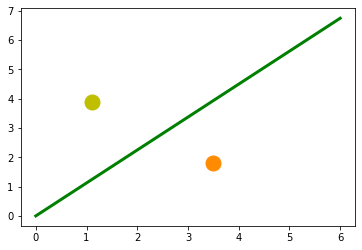

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()

ax.plot(3.5, 1.8, "o", 
        color ="darkorange",
        markersize = 15)
ax.plot(1.1, 3.9, "oy", 
        markersize=15)

point_on_line = (4, 4.5)

# calcualte gradient:

m = point_on_line[1] / point_on_line[0]
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()

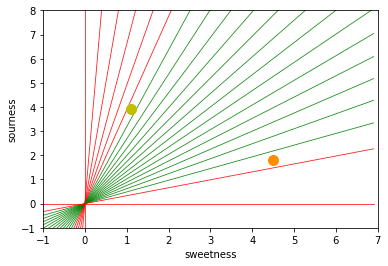

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """ 
        returns tuple (d, pos)
        d is the distance
        If pos == -1 point is below the line, 
        0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance
    
orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)

step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)

size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index== 0:
        ax.plot(x, y, "o", 
                color="darkorange", 
                markersize=size)
    else:
        ax.plot(x, y, "oy", 
                markersize=size)


plt.show()

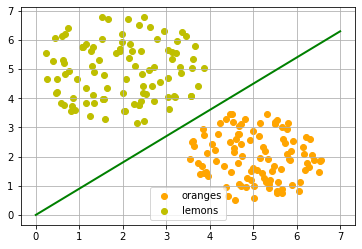

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius, 
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

ax.plot(X, 0.9 * X, "g-", linewidth=2)

ax.legend()
ax.grid()
plt.show()


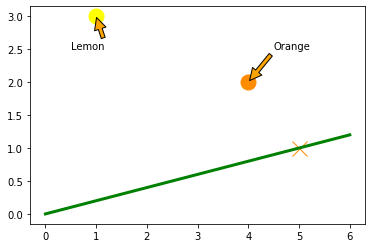

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_fruits(p1, p2, point_on_line=(5,1)):
  X = np.arange(0, 7)
  fig, ax = plt.subplots()
  ax.plot(p1[0], p1[1], "o", 
          color="darkorange", 
          markersize=15)
  ax.annotate("Orange", 
              xy=(p1[0], p1[1]), 
              xytext=(p1[0]+0.5, p1[1]+0.5),
              arrowprops=dict(facecolor='orange', shrink=0.05))
  ax.plot(p2[0], p2[1], "o", 
          color="yellow", 
          markersize=15)
  ax.annotate("Lemon", 
              xy=(p2[0], p2[1]), 
              xytext=(p2[0]-0.5, p2[1]-0.5),
              arrowprops=dict(facecolor='orange', shrink=0.05))
  ax.plot(*point_on_line, "x", 
          color="darkorange", 
          markersize=15)
  # calculate gradient:
  m = point_on_line[1] / point_on_line[0]  
  ax.plot(X, m * X, "g-", linewidth=3)
  plt.show()

orange = (4, 2)
lemon = (1, 3)
point = (5, 1)
plot_fruits(p1=orange, p2=lemon, point_on_line=point)


In [ ]:
m = point[1] / point[0]
m * orange[0] - orange[1]


-1.2

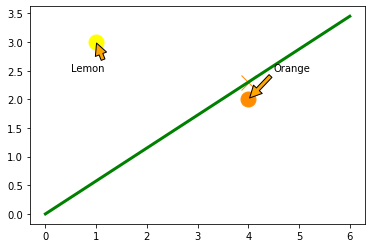

0.2999999999999998

In [ ]:
delta = 0.3
plot_fruits(p1=(4, 2), p2=(1, 3), point_on_line=(4, 2+delta))

new_slope = (2 + delta) / 4
# position of orange:
new_slope * orange[0] - orange[1]

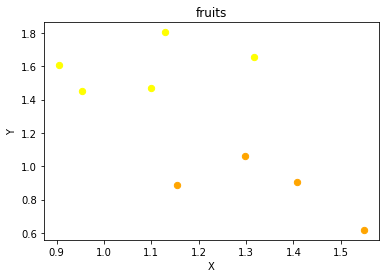

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

number_of_samples = 9
centers = [(1, 1.5), (1.5, 1)]
data, labels = make_blobs(n_samples=number_of_samples, 
                          cluster_std=0.2,
                          centers=np.array(centers),
                          random_state=42)

fruits = [(data[i], labels[i]) for i in range(len(data))]

fig, ax = plt.subplots()
colours = ["yellow", "orange"]
label_name = ["Lemons", "Oranges"]
for label in range(0, 2):
    ax.scatter(data[labels==label, 0], 
               data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label_name[label])

ax.set(xlabel='X', ylabel='Y', title='fruits');


0.3 0.41544252971893364
0.7154425297189336 1.4073164614375075 0.9068540492859486
0.7154425297189336 0.1808263111956887
0.8962688409146223 1.2974337759331152 1.0628494665190549
The final value for the slope: 0.8962688409146223


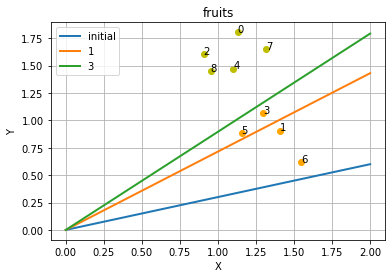

In [ ]:
slope = 0.3
def adjust(slope=0.3):
    line = None
    delta = 0.1
    counter = -1
    for ((x, y), label) in zip(data, labels):   
        counter += 1
        ax.scatter(x, y,
                   color="y" if label == 0 else "orange")
        ax.annotate(str(counter), 
                    (x, y))
 
        pos2line = slope * x - y
        target_slope = (y + delta) / x
        error = (target_slope - slope) 
        #print(label, pos2line)
        if label == 1 and pos2line < 0:
            # point is above line but should be below 
            # => increment slope
            print(slope, error)
            slope += error 
            print(slope, x, y)
            ax.plot(X, slope * X, 
                    linewidth=2, label=str(counter))

        elif label == 0 and pos2line > 0:
            # point is below line but should be above 
            # => decrement slope
            #print(pos2line, label)
            print(slope, error)
            slope += error 
            print(slope, x, y)
            ax.plot(X, slope * X,  
                    linewidth=2, label=str(counter))
    return slope

X = np.arange(0, 3)
fig, ax = plt.subplots()
colours = ["orange", "yellow"]
label_name = ["Oranges", "Lemons"]


ax.set(xlabel='X', ylabel='Y', title='fruits')
slope_count = 1
ax.plot(X, 
        slope * X,  
        linewidth=2,
        label="initial")
slope = adjust(slope)

ax.legend()
ax.grid()

print(f'The final value for the slope: {slope}')

plt.show()

In [ ]:
data = np.concatenate((data, np.array([[1.1, 1.6]])))
labels = np.concatenate((labels, np.array([1])))


[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'fruits')]

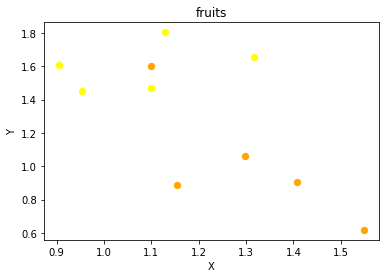

In [ ]:
fig, ax = plt.subplots()
colours = ["yellow", "orange"]
label_name = ["Lemons", "Oranges"]
for label in range(0, 2):
    ax.scatter(data[labels==label, 0], 
               data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label_name[label])

ax.set(xlabel='X', ylabel='Y', title='fruits')


0.3 0.41544252971893364
0.7154425297189336 0.1808263111956887
0.8962688409146223 0.6491857045399231
The final value for the slope: 1.5454545454545454


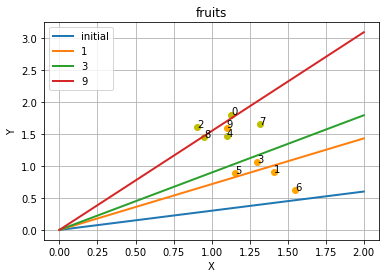

In [ ]:
start_slope = 0.3
def adjust(slope=0.3):
    line = None
    delta = 0.1
    counter = -1
    for ((x, y), label) in zip(data, labels):   
        counter += 1   
        ax.scatter(x, y,
                   color="y" if label == 0 else "orange")
        ax.annotate(str(counter), 
                    (x, y))
 
        pos2line = slope * x - y
        target_slope = (y + delta) / x
        error = (target_slope - slope) 
        #print(label, pos2line)
        if label == 1 and pos2line < 0:
            # point is above line but should be below 
            # => increment slope
            print(slope, error)
            slope += error 
            ax.plot(X, slope * X, 
                    linewidth=2, label=str(counter))

        elif label == 0 and pos2line > 0:
            # point is below line but should be above 
            # => decrement slope
            print(slope, error)
            slope += error 
            ax.plot(X, slope * X,  
                    linewidth=2, label=str(counter))
    return slope

fig, ax = plt.subplots()
colours = ["orange", "yellow"]
label_name = ["Oranges", "Lemons"]


ax.set(xlabel='X', ylabel='Y', title='fruits')
slope_count = 1
ax.plot(X, 
        start_slope * X,  
        linewidth=2,
        label="initial")
slope = adjust(start_slope)

ax.legend()
ax.grid()
print(f'The final value for the slope: {slope}')
plt.show()


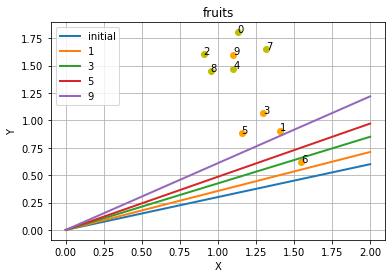

0.609691601006235


In [ ]:
learning_rate, start_slop = 0.1, 0.3

def adjust(slope=0.3, learning_rate=0.3):
    line = None
    delta = 0.3
    counter = -1
    for ((x, y), label) in zip(data, labels):   
        counter += 1 
        ax.scatter(x, y,
                   color="y" if label == 0 else "orange")
        ax.annotate(str(counter), 
                    (x, y))
 
        pos2line = slope * x - y
        target_slope = (y + delta) / x
        error = (target_slope - slope) 
        if label == 1 and pos2line < 0:
            # point is above line but should be below 
            # => increment slope
            slope += error * learning_rate
            ax.plot(X, slope * X, 
                    linewidth=2, label=str(counter))

        elif label == 0 and pos2line > 0:
            # point is below line but should be above 
            # => decrement slope
            slope += error * learning_rate
            ax.plot(X, slope * X,  
                    linewidth=2, label=str(counter))
    return slope

fig, ax = plt.subplots()
colours = ["orange", "yellow"]
label_name = ["Oranges", "Lemons"]


ax.set(xlabel='X', ylabel='Y', title='fruits')
slope_count = 1
ax.plot(X, 
        start_slope * X,  
        linewidth=2,
        label="initial")
slope = adjust(start_slope, learning_rate)

ax.legend()
ax.grid()
plt.show()

print(slope)

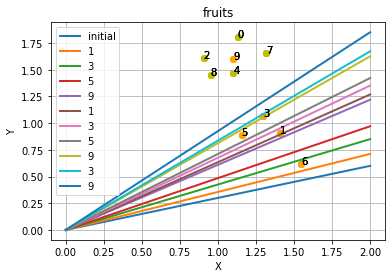

0.9256980198268796


In [ ]:
fig, ax =plt.subplots()
colours = ['orange', 'yellow']
label_name = ['Oranges', "Lemons"]


ax.set(xlabel= 'X', ylabel='Y', title='fruits')
slop_count = 1
ax.plot(X,
        start_slope * X,
        linewidth=2,
        label="initial")
slope = adjust(start_slope, learning_rate)
# redo the learning, we use the current slope as the start slope:
slope = adjust(slope, learning_rate)
# and again once more:
slope = adjust(slope, learning_rate)

ax.legend()
ax.grid()
plt.show()

print(slope)

In [ ]:
import numpy as np

class perceptron:

  def __init__(self, weights):
    """'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
    self.weights = np.array(weights)


  def __call__(self, in_data):
    Weighted_input = self.weights * in_data
    Weighted_sum = Weighted_input.sum()
    return Weighted_sum

  
p = perceptron(weights=[-0.45, 0.5])
p([2.9, 4])

0.6950000000000001

In [ ]:
for point in zip(oranges_x[:10], oranges_y[:10]):
  res = p(point)
  print(res, end=",")

for point in zip(lemons_x[:10], lemons_y[:10]):
  res = p(point)
  print(res, end=", ")


-1.5499648332154528,-1.452689049763446,-0.7849966672706832,-0.3667692754204477,-0.6091117697430781,-1.278914221099099,-0.4374444691475772,-0.8666413167422906,-0.9104149244121722,-1.6928478009837336,1.9360174951346782, 2.608777833705058, 2.219715739744773, 2.2220267785514602, 1.44317209532537, 1.6177600883085577, 1.3215361859592933, 1.0183805475534538, 2.2383219588749608, 2.1877318146943954, 

In [ ]:
from collections import Counter

evaluation = Counter()
for point in zip(oranges_x, oranges_y):
  res = p(point)
  if res < 0:
    evaluation['corrects'] += 1
  else:
    evaluation['wrongs'] += 1

for point in zip(lemons_x, lemons_y):
  res = p(point)
  if res >= 0:
    evaluation['corrects'] += 1
  else:
    evaluation['wrongs'] += 1
print(evaluation)

Counter({'corrects': 200})


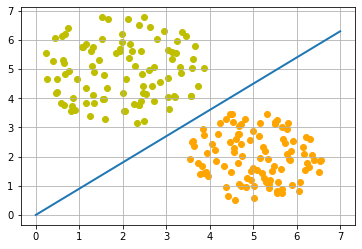

0.9


In [ ]:
import time
import matplotlib.pyplot as plt

slope - 0.1
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x, oranges_y,
           c = 'orange',
           label = 'oranges')

ax.scatter(lemons_x,
           lemons_y,
           c ="y",
           label = "lemons")

slope = 0.45 / 0.5
ax.plot(X, slope * X, linewidth=2)

ax.grid()
plt.show()

print(slope)

In [ ]:
from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons, 
                         [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res    
print(train_data[:10], train_labels[:10])

[(3.785757142177001, 1.4052455691595502), (1.2965502010307808, 5.121754160329804), (4.862029655401567, 1.2600182946494343), (5.27916414097086, 2.193419284675576), (6.229754949015019, 1.7874673272863455), (1.536592422036338, 3.971317497570385), (4.139072018965958, 1.8339399879982086), (1.5716192752038887, 4.80045936917023), (1.1487549358778775, 4.353671682327116), (4.570707535783218, 0.5243982977160508)] [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]


In [ ]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, 
                 weights,
                 learning_rate=0.1):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
     
    # activation function:
    @staticmethod
    def unit_step_function(x):
        if  x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
                

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)

[('correct', 132), ('wrong', 28)]
[('correct', 31), ('wrong', 9)]
[-1.70485685  3.64524793]


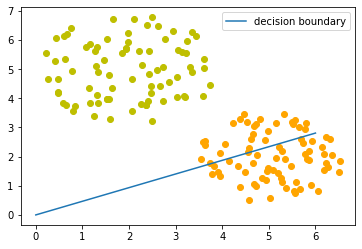

[-1.70485685  3.64524793]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)


0 -6.8742445425238285 [-0.27857571 -0.04052456] (3.785757142177001, 1.4052455691595502)
1 0.31574350228772086 [-0.14892069  0.47165086] (1.2965502010307808, 5.121754160329804)
3 2.6825729333855257 [-0.67683711  0.25230893] (5.27916414097086, 2.193419284675576)
5 0.8055822214287531 [-0.52317787  0.64944068] (1.536592422036338, 3.971317497570385)


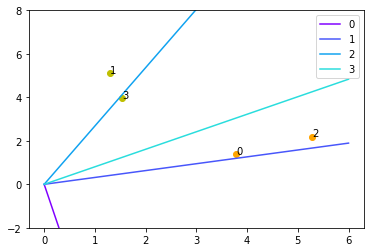

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.1)
number_of_colors = 10
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))

fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])

counter = 0
for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] == 0 else "y"        
        ax.scatter(train_data[index][0], 
                   train_data[index][1],
                   color=color)
        ax.annotate(str(counter), 
                    (train_data[index][0], train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index, m, p.weights, train_data[index])
        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1
ax.legend()
plt.show()

[]

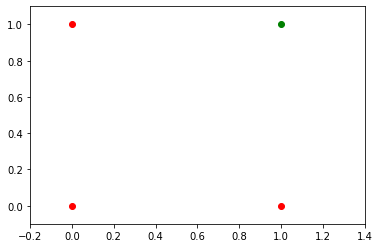

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0,0, color= 'r')
ax.scatter(0,1, color= 'r')
ax.scatter(1,0, color= 'r')
ax.scatter(1,1,color = 'g')
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1

plt.plot()

[]

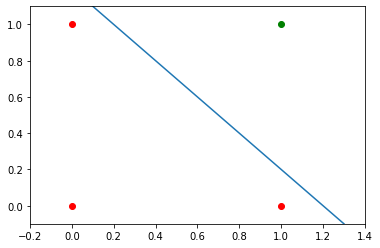

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color ='r')
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c )
plt.plot()

In [ ]:
import numpy as np
from collections import Counter

class Perceptron:

  def __init__(self, weights, bias=1, learning_rate=0.3):
    self.weights = np.array(weights)
    self.bias = bias
    self.learing_rate = learning_rate
  @staticmethod
  def unit_step_function(x):
    if x <= 0:
      return 0
    else:
      return 1

  def __call__(self, in_data):
    in_data = np.concatenate((in_data, [self.bias]))

    result = self.weights @ in_data
    return Perceptron.unit_step_function(result)

  def adjust(self, target_result, in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  # 
        calculated_result = self(in_data)
        error = target_result - calculated_result
        if error != 0:
            in_data = np.concatenate( (in_data, [self.bias]) )
            correction = error * in_data * self.learning_rate
            self.weights += correction
            
  def evaluate(self, data, labels):
      evaluation = Counter()
      for sample, label in zip(data, labels):
          result = self(sample) # predict
          if result == label:
              evaluation["correct"] += 1
          else:
              evaluation["wrong"] += 1
      return evaluation

In [ ]:
import numpy as np
from perceptrons import Perceptron

def labelled_samples(n):
  for _ in range(n):
    s = np.random.randint(0,2, (2,))
    yield (s, 1) if s[0] ==1 and s[1] ==1 else (s, 0)

p = Perceptron(weights=[0.3, 0.3, 0.3], learning_rate=0.2)

for in_data, label in labelled_samples(30):
  p.adjust(label, in_data)

test_data, test_labels = list(zip(*labelled_samples(30)))
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 30})


-3.0000000000000004 3.0000000000000013


[]

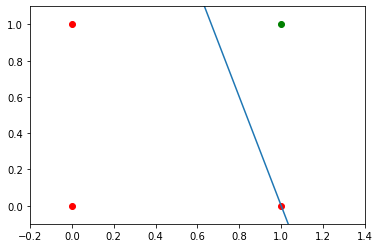

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()

In [ ]:
from sklearn.datasets import make_blobs

n_samples = 1000
samples, labels = make_blobs(n_samples = n_samples,
                             centers=([2.5, 3], [6.7, 7.9]),
                             cluster_std=1.4,
                             random_state=0
                             )

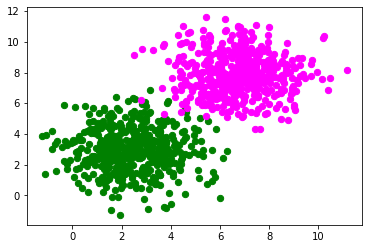

In [ ]:
import matplotlib.pyplot as plt

colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()


for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))

In [ ]:
from sklearn.model_selection import train_test_split
res = train_test_split(samples, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)

train_data, test_data, train_labels, test_labels = res 
from perceptrons import Perceptron

p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.8)

for sample, label in zip(train_data, train_labels):
    p.adjust(label,
             sample)

evaluation = p.evaluate(train_data, train_labels)
print(evaluation)

Counter({'correct': 784, 'wrong': 16})


In [ ]:
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 194, 'wrong': 6})


In [ ]:
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)


Counter({'correct': 194, 'wrong': 6})


-1.4277135509226737 10.516023065099064


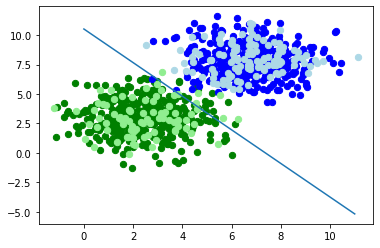

In [ ]:
import matplotlib .pyplot as plt

fig, ax = plt.subplots()

#plotting learn data
colours = ('green', 'blue')
for n_class in range(2):
  ax.scatter(train_data[train_labels==n_class][:,0],
  train_data[train_labels==n_class][:,1],
             c=colours[n_class], s=40, label=str(n_class))

# plotting test data
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels==n_class][:, 0], 
               test_data[test_labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))


    
X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()


In [ ]:
from perceptrons import Perceptron

p = Perceptron(weights=[0.3, 0.3, 0.3], 
               bias =1,
               learning_rate=0.2)

def labelled_samples(n):
  for _ in range(n):
    s = np.random.random((2,))
    yield (s, 1) if s[0] >= 0.5 and s[1] >= 0.5 else (s, 0)

for in_data, label in labelled_samples(30):
  p.adjust(label, in_data)

test_data, test_labels = list(zip(*labelled_samples(60)))
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'wrong': 36, 'correct': 24})


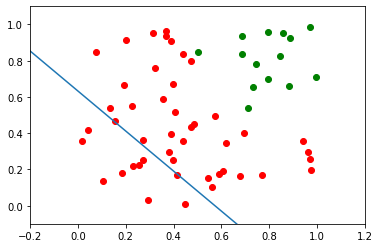

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

In [ ]:
from perceptrons import Perceptron
import numpy as np
from collections import Counter

def labelled_samples(n):
  for _ in range(n):
    s =np.random.random((2,))
    yield (s, 0) if s[0] < 0.5 else (s,1)

p = Perceptron(weights=[0.3, 0.3, 0.3], learning_rate=0.4)
for in_data, label in labelled_samples(300):
    p.adjust(label, 
             in_data)

test_data, test_labels = list(zip(*labelled_samples(500)))

print(p.weights)
p.evaluate(test_data, test_labels)


[ 2.04818399  0.29080106 -0.9       ]


Counter({'correct': 429, 'wrong': 71})

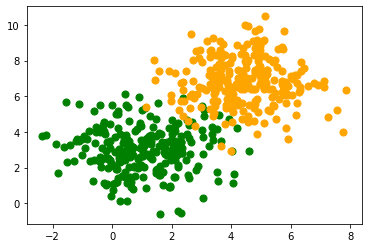

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 500
data, labels = make_blobs(n_samples=n_samples, 
                             centers=([1.1, 3], [4.5, 6.9]), 
                             cluster_std=1.3,
                             random_state=0)


colours = ('green', 'orange')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=50, 
               label=str(n_class))

In [ ]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(data, 
                            labels,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42)
p.fit(train_data, train_labels)

Perceptron(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

predictions_train = p.predict(train_data)
predictions_test = p.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("score on train data:", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("score on test data:", test_score)


score on train data: 0.9725
score on test data: 0.94


In [ ]:
p.score(train_data, train_labels)

0.9725

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
targets = (iris.target == 0).astype(np.int8)
print(targets)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42,
               max_iter=10,
               tol=0.001)
p.fit(train_data, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Perceptron(max_iter=10, random_state=42)

In [ ]:
import random


sample = random.sample(range(len(train_data)), 10)
for i in sample:
    print(i, p.predict([train_data[i]]))

31 [0]
1 [1]
14 [0]
380 [0]
204 [0]
39 [1]
387 [1]
378 [1]
205 [0]
160 [1]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(p.predict(train_data), train_labels))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       152
           1       1.00      0.80      0.89       248

    accuracy                           0.88       400
   macro avg       0.88      0.90      0.87       400
weighted avg       0.91      0.88      0.88       400



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(p.predict(test_data), test_labels))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        33
           1       1.00      0.78      0.87        67

    accuracy                           0.85       100
   macro avg       0.84      0.89      0.84       100
weighted avg       0.90      0.85      0.85       100



In [ ]:
import numpy as np

input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


In [ ]:
import numpy as np

input_vecotor = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)

print("The shape of this vector: ", input_vector.shape)


The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)


In [ ]:
import numpy as np

number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)

# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


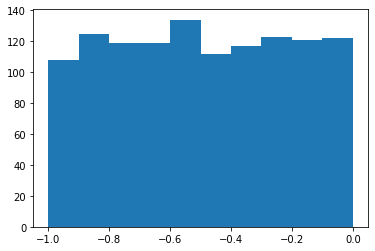

In [ ]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()


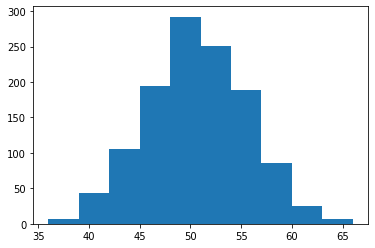

In [ ]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

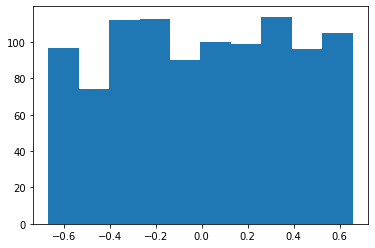

In [ ]:
from scipy.stats import truncnorm

s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)

plt.hist(s)
plt.show()


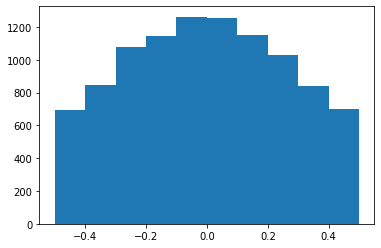

In [ ]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)

plt.hist(s)
plt.show()


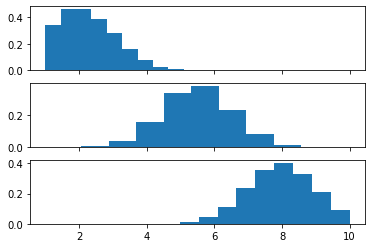

In [ ]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()

In [ ]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)

X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[ 0.46647577,  0.25190277, -0.02904377],
       [ 0.24318445,  0.12231435,  0.23928456],
       [-0.30916983,  0.17440036,  0.46273713],
       [ 0.34547961,  0.57187812,  0.1612209 ]])

In [ ]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes)  # this is the input in this layer!

X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[ 0.11478796,  0.22185746,  0.32463739,  0.26618691],
       [ 0.14672793,  0.38719727, -0.02357574,  0.41599579]])

In [ ]:
import numpy as np
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
   
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes,  # corresponds to the number of classes
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes 
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate  
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
           
    
    def train(self):
        pass
    
    def run(self):
        pass

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes = 3, 
                               no_of_out_nodes = 2, 
                               no_of_hidden_nodes = 4,
                               learning_rate = 0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)

[[ 0.21554127  0.22060313 -0.36616098]
 [-0.50792508 -0.22220065  0.26327934]
 [ 0.33783105 -0.36364937  0.24431453]
 [ 0.16234145  0.51903769 -0.57526632]]
[[-0.01452852 -0.20267771 -0.40648334 -0.23894145]
 [-0.20021814  0.43207514  0.20174576  0.00244046]]


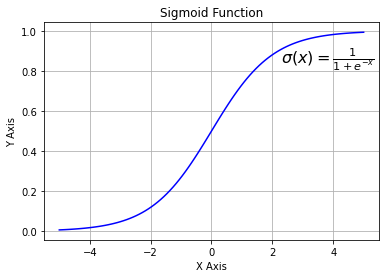

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)


plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()

plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)


plt.show()


In [ ]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


Text(0.3, 0.1, "$\\sigma\\'(x) = \\sigma(x)(1 - \\sigma(x))$")

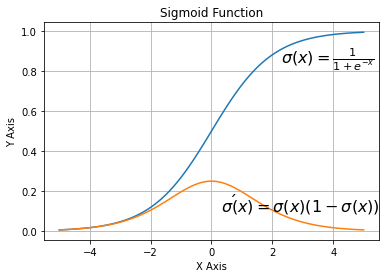

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)

plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1 - sigma(X)))

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()

plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)


In [ ]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])

array([0.95257413, 0.98201379, 0.99330715])

In [ ]:
# alternative activation function
def ReLU(x):
    return np.maximum(0.0, x)

# derivation of relu
def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 1


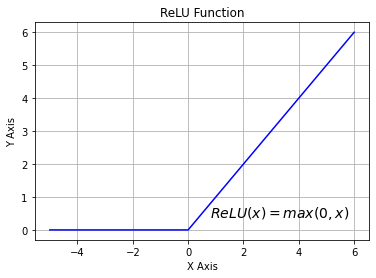

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-5, 6, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()

In [ ]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


class NeuralNetwork:
           
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
    
    
    def train(self, input_vector, target_vector):
        pass
            
    
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'. 
        'input_vector' can be tuple, list or ndarray
        """
        # turning the input vector into a column vector
        # turn one-dimensional into 2-dimensional column vector:
        input_vector = np.array(input_vector, ndmin=2).T
        input_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=4,
                               learning_rate=0.6)


In [ ]:
simple_network.run([(3, 4)])


array([[0.34755135],
       [0.34753273]])

# Backpropagation in Neural Networks

In [ ]:
 #example who:
import numpy as np


who = np.array([[0.6, 0.5, 0.06],
                [0.3, 0.2, 0.8],
                [0.2, 0.1, 0.7],
                [0.12, 0.7, 0.54]])

e = np.array([0.1, 0.2, 0.3])

who * e

array([[0.06 , 0.1  , 0.018],
       [0.03 , 0.04 , 0.24 ],
       [0.02 , 0.02 , 0.21 ],
       [0.012, 0.14 , 0.162]])

# Training a Neural Network with Python

In [ ]:
from sklearn.datasets import make_blobs

n_samples = 500
blob_centers = ([2, 6], [6, 2], [7, 7])
n_classes = len(blob_centers)
data, labels = make_blobs(n_samples=n_samples, 
                          centers=blob_centers, 
                          random_state=7)


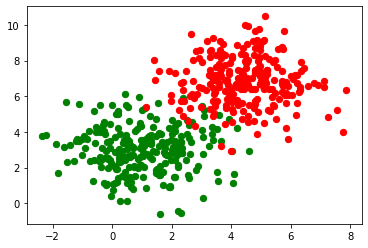

In [ ]:
import matplotlib.pyplot as plt

colours = ('green', 'red', "yellow")
fig, ax = plt.subplots()

for n_class in range(n_classes):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=40, 
               label=str(n_class))

In [ ]:
labels[:7]

array([1, 0, 0, 0, 0, 0, 1])

In [ ]:
import numpy as np

labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(np.float64)
labels[:7]

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res    
train_labels[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
from neural_networks1 import NeuralNetwork

simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=3, 
                               no_of_hidden_nodes=5,
                               learning_rate=0.3)

In [ ]:
for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])

In [ ]:
from neural_networks2 import NeuralNetwork

simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=3, 
                               no_of_hidden_nodes=5,
                               learning_rate=0.1,
                               bias=1)
    

for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])

    
simple_network.evaluate(train_data, train_labels)

(380, 20)

In [ ]:
# import numpy as np

# c = np.loadtxt("data/strange_flowers.txt", delimiter=" ")

# data = c[:, :-1]
# labels = c[:, -1]
# n_classes = int(np.max(labels)) # in our case 1, ... 4
# data[:5]

In [ ]:
labels[:10]

# Softmax as Activation Function


In [ ]:
import numpy as np

def softmax(x):
  """ applies softmax to an input x"""
  e_x = np.exp(x)
  return e_x / e_x.sum()

x = np.array([1, 0, 3, 5])
y = softmax(x)
y, x / x.sum()

(array([0.01578405, 0.00580663, 0.11662925, 0.86178007]),
 array([0.11111111, 0.        , 0.33333333, 0.55555556]))

In [ ]:
import numpy as np

def softmax(x):
    """ applies softmax to an input x"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


softmax(x)

array([0.04742587, 0.95257413])

In [ ]:
import numpy as np

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

s = softmax(np.array([0, 4, 5]))

si_sj = - s * s.reshape(3, 1)
print(s)
print(si_sj)
s_der = np.diag(s) + si_sj
s_der

[0.00490169 0.26762315 0.72747516]
[[-2.40265555e-05 -1.31180548e-03 -3.56585701e-03]
 [-1.31180548e-03 -7.16221526e-02 -1.94689196e-01]
 [-3.56585701e-03 -1.94689196e-01 -5.29220104e-01]]


array([[ 0.00487766, -0.00131181, -0.00356586],
       [-0.00131181,  0.196001  , -0.1946892 ],
       [-0.00356586, -0.1946892 ,  0.19825505]])

In [ ]:
import numpy as np
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()


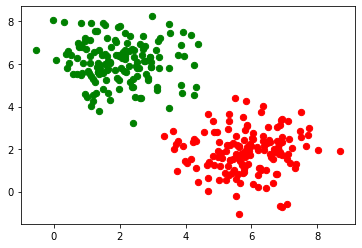

In [ ]:
from sklearn.datasets import make_blobs

n_samples = 300
samples, labels = make_blobs(n_samples=n_samples, 
                             centers=([2, 6], [6, 2]), 
                             random_state=0)

import matplotlib.pyplot as plt


colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
fig, ax = plt.subplots()


for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))
    
size_of_learn_sample = int(n_samples * 0.8)
learn_data = samples[:size_of_learn_sample]
test_data = samples[-size_of_learn_sample:]

In [ ]:
from neural_networks_softmax import NeuralNetwork

simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=5,
                               learning_rate=0.3,
                               softmax=True)

In [ ]:
for x in [(1, 4), (2, 6), (3, 3), (6, 2)]:
    y = simple_network.run(x)
    print(x, y, s.sum())

(1, 4) [[0.46113804]
 [0.53886196]] 1.0
(2, 6) [[0.47713299]
 [0.52286701]] 1.0
(3, 3) [[0.47408058]
 [0.52591942]] 1.0
(6, 2) [[0.4844761]
 [0.5155239]] 1.0


In [ ]:
labels_one_hot = (np.arange(2) == labels.reshape(labels.size, 1))
labels_one_hot = labels_one_hot.astype(np.float64)

for i in range(size_of_learn_sample):
    #print(learn_data[i], labels[i], labels_one_hot[i])
    simple_network.train(learn_data[i], 
                         labels_one_hot[i])
    
from collections import Counter

evaluation = Counter()
simple_network.evaluate(learn_data, labels)

(235, 5)